# Clustering methods – mean-shift, spectral, affinity

In [82]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

%matplotlib inline

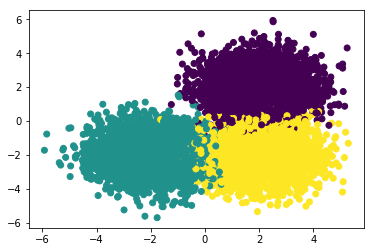

In [42]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

# Mean-shift Clustering

In [43]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

#Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding = True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count your clusters
n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters: {}'.format(n_clusters_))

Number of estimated clusters: 3


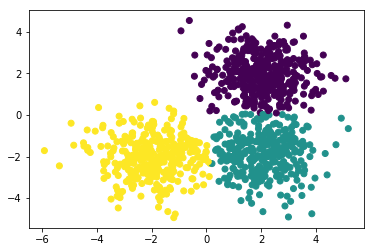

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [44]:
plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

# Spectral Clustering

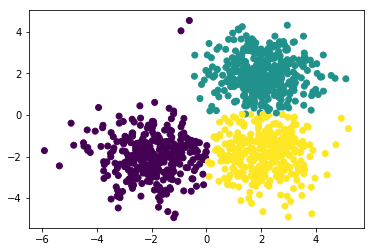

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        2  350   10
1      310    1    9
2        6    7  305


In [13]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predicted clusters
predict = sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:,0], X_train[:,1], c = predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

# Affinity Propogation

In [20]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 93


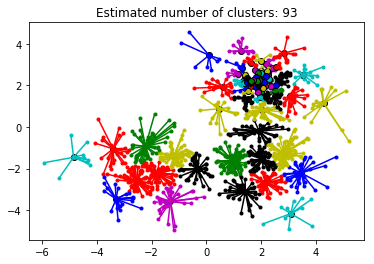

In [25]:
from itertools import cycle

plt.figure()
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

## Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one.

## Configuration 1

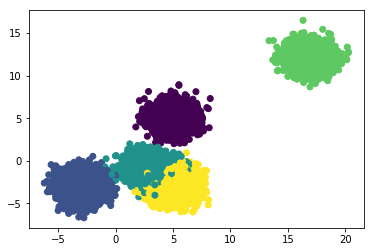

In [72]:
# The coordinates of the centers of our blobs.
centers = [[5,5],[-3,-3],[3,-1], [17,12], [5, -3]]

# Make 10,000 rows worth of data with two features representing FIVE
# clusters, each having a standard deviation of 1.

X,y = make_blobs(
    n_samples = 10000,
    centers = centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.9,
    random_state = 42)

## K-Means

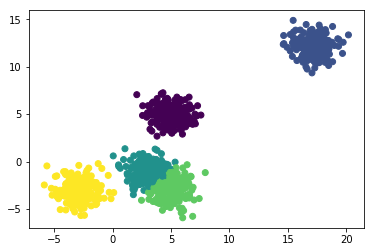

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0    0    0    0  203
2        0    0  173   16    2
3        0  187    0    0    0
4        0    0   13  185    0


In [73]:
# Run without timeit

# Each batch will be made up of 1000 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=1000)
minibatchkmeans.fit(X_train)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict_mini)
plt.show()

# Check the MiniBatch model against our earlier one.
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict_mini))

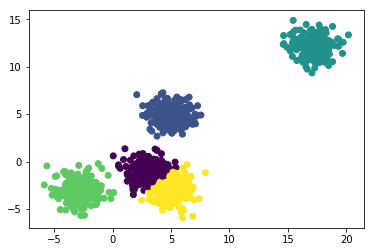

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0  221    0    0    0
1        0    0    0  203    0
2      175    0    0    2   14
3        0    0  187    0    0
4       14    0    0    0  184


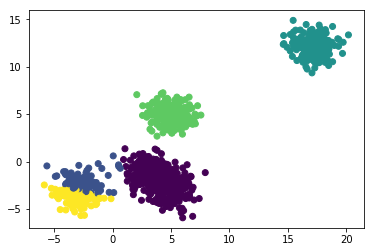

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0    0  221    0
1        0  103    0    0  100
2      185    6    0    0    0
3        0    0  187    0    0
4      198    0    0    0    0


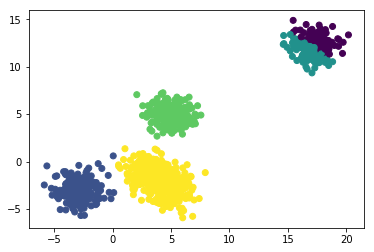

Comparing the assigned categories to the ones in the data:
col_0   0    1    2    3    4
row_0                        
0       0    0    0  221    0
1       0  203    0    0    0
2       0    3    0    0  188
3      87    0  100    0    0
4       0    0    0    0  198


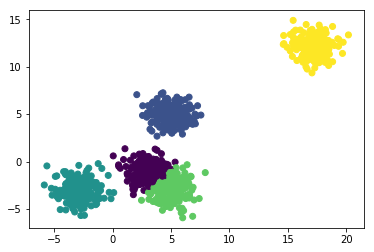

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0  221    0    0    0
1        0    0  203    0    0
2      173    0    2   16    0
3        0    0    0    0  187
4       15    0    0  183    0


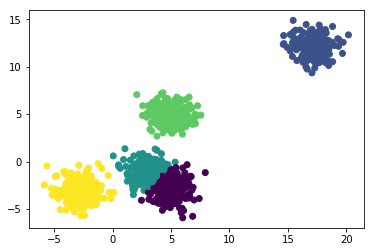

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0    0  221    0
1        0    0    0    0  203
2       21    0  168    0    2
3        0  187    0    0    0
4      187    0   11    0    0


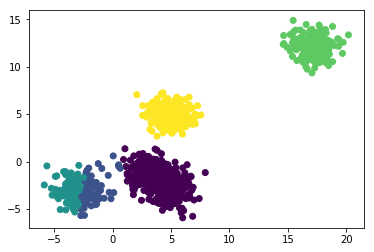

Comparing the assigned categories to the ones in the data:
col_0    0   1    2    3    4
row_0                        
0        0   0    0    0  221
1        0  67  136    0    0
2      185   6    0    0    0
3        0   0    0  187    0
4      198   0    0    0    0


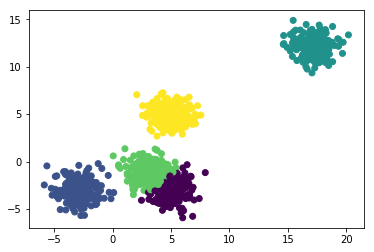

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0    0    0  221
1        0  203    0    0    0
2        9    2    0  180    0
3        0    0  187    0    0
4      175    0    0   23    0


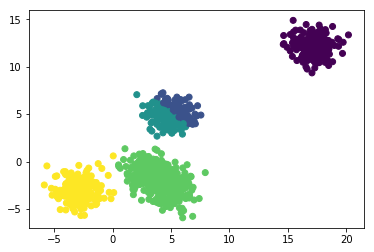

Comparing the assigned categories to the ones in the data:
col_0    0   1    2    3    4
row_0                        
0        0  92  129    0    0
1        0   0    0    0  203
2        0   0    0  188    3
3      187   0    0    0    0
4        0   0    0  198    0
255 ms ± 21.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
%%timeit
# Run with timeit


# Each batch will be made up of 1000 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=1000)
minibatchkmeans.fit(X_train)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict_mini)
plt.show()

# Check the MiniBatch model against our earlier one.
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict_mini))
         

With timeit, makes strange permutations (does 7 runs), splitting small blob.

## Mean-shift Clustering

With quantile of 0.2, gave me 4 clusters.  Quantile of 0.3 gave me 2 clusters.  I had to use quantile of 0.1 to get 5 clusters.

Number of estimated clusters: 5


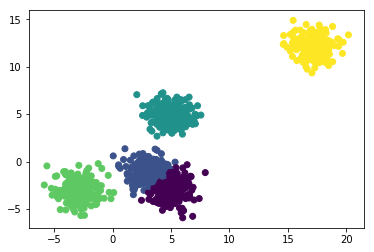

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4
row_0                         
0        0    0  221    0    0
1        0    0    0  203    0
2       16  173    0    2    0
3        0    0    0    0  187
4      182   16    0    0    0


In [76]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.1)

#Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding = True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count your clusters
n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters: {}'.format(n_clusters_))

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

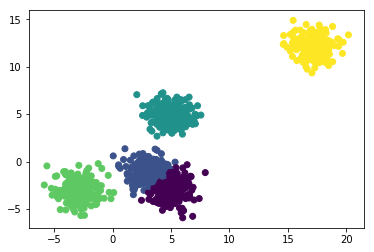

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4
row_0                         
0        0    0  221    0    0
1        0    0    0  203    0
2       16  173    0    2    0
3        0    0    0    0  187
4      182   16    0    0    0


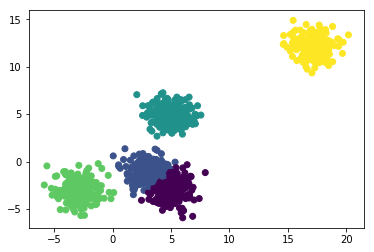

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4
row_0                         
0        0    0  221    0    0
1        0    0    0  203    0
2       16  173    0    2    0
3        0    0    0    0  187
4      182   16    0    0    0


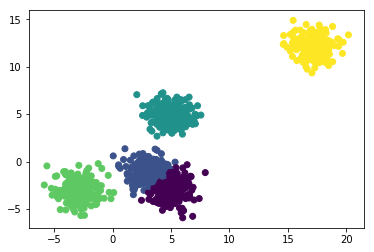

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4
row_0                         
0        0    0  221    0    0
1        0    0    0  203    0
2       16  173    0    2    0
3        0    0    0    0  187
4      182   16    0    0    0


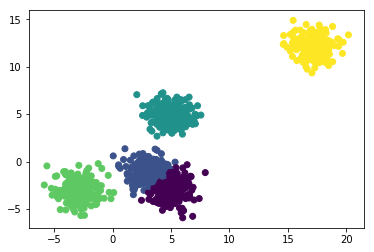

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4
row_0                         
0        0    0  221    0    0
1        0    0    0  203    0
2       16  173    0    2    0
3        0    0    0    0  187
4      182   16    0    0    0


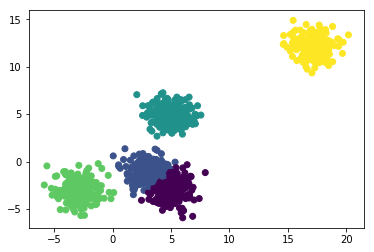

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4
row_0                         
0        0    0  221    0    0
1        0    0    0  203    0
2       16  173    0    2    0
3        0    0    0    0  187
4      182   16    0    0    0


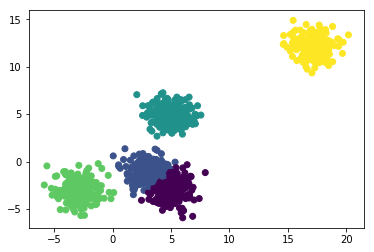

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4
row_0                         
0        0    0  221    0    0
1        0    0    0  203    0
2       16  173    0    2    0
3        0    0    0    0  187
4      182   16    0    0    0


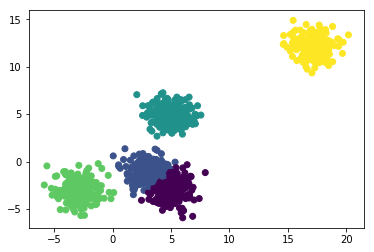

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4
row_0                         
0        0    0  221    0    0
1        0    0    0  203    0
2       16  173    0    2    0
3        0    0    0    0  187
4      182   16    0    0    0


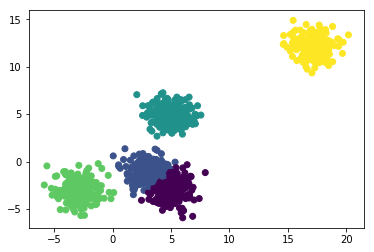

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4
row_0                         
0        0    0  221    0    0
1        0    0    0  203    0
2       16  173    0    2    0
3        0    0    0    0  187
4      182   16    0    0    0
427 ms ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [77]:
%%timeit
# Run with timeit

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.1)

#Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding = True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

This time, it doesn’t do the strange split of smaller blobs.  The 7 runs show consistent split.

## Spectral Clustering

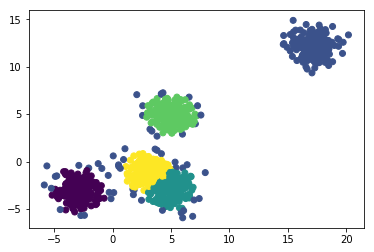

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0   14    0  207    0
1      189   14    0    0    0
2        0   17   14    0  160
3        0  187    0    0    0
4        0   10  175    0   13


In [78]:
# We're looking for FIVE clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predicted clusters
predict = sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:,0], X_train[:,1], c = predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

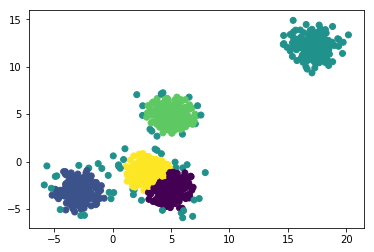

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0   14  207    0
1        0  189   14    0    0
2       14    0   17    0  160
3        0    0  187    0    0
4      175    0   10    0   13


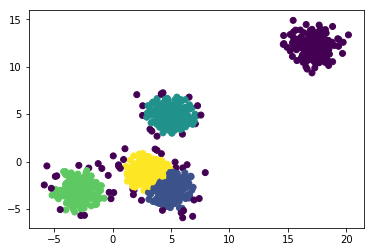

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0       14    0  207    0    0
1       14    0    0  189    0
2       17   14    0    0  160
3      187    0    0    0    0
4       10  175    0    0   13


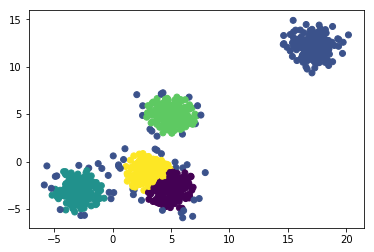

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0   14    0  207    0
1        0   14  189    0    0
2       14   17    0    0  160
3        0  187    0    0    0
4      175   10    0    0   13


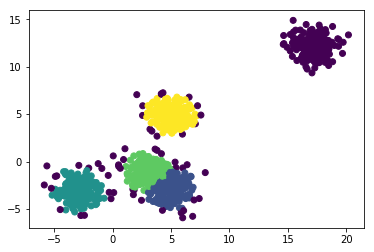

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0       14    0    0    0  207
1       14    0  189    0    0
2       17   14    0  160    0
3      187    0    0    0    0
4       10  175    0   13    0


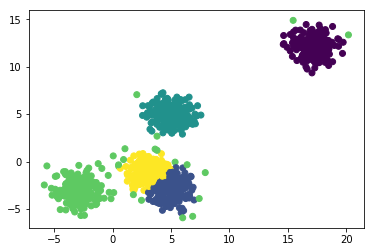

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0  219    2    0
1        0    0    0  203    0
2        0   15    0   12  164
3      185    0    0    2    0
4        0  180    0    5   13


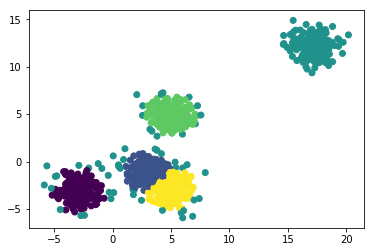

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0   14  207    0
1      189    0   14    0    0
2        0  160   17    0   14
3        0    0  187    0    0
4        0   13   10    0  175


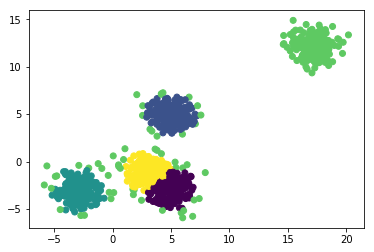

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0  207    0   14    0
1        0    0  189   14    0
2       14    0    0   17  160
3        0    0    0  187    0
4      175    0    0   10   13


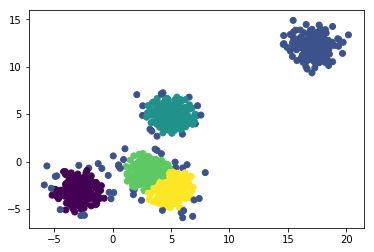

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0   14  207    0    0
1      189   14    0    0    0
2        0   17    0  160   14
3        0  187    0    0    0
4        0   10    0   13  175
827 ms ± 52.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
%%timeit
# Run with timeit


# We're looking for FIVE clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predicted clusters
predict = sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:,0], X_train[:,1], c = predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

Spectral Clustering classifies the points farthest from each blob as one particular type, different from the k-means and mean shift clustering.

## Affinity Propogation

First, lets compare the time it takes to declare and fit a model, in 2 lines or 1 line.

In [84]:
%%timeit

# Declare and fit the model.
af = AffinityPropagation()
af.fit(X_train)


5.3 s ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
%%timeit

af2 = AffinityPropagation().fit(X_train)

5.36 s ± 228 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It looks like it takes it longer to process when you declare and fit in one line.

Ok, now we can get back to work.

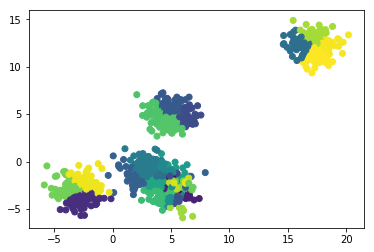

Comparing the assigned categories to the ones in the data: 
col_0  0   1   2   3   4   5   6   7   8   9  ...  66  67  68  69  70  71  72  \
row_0                                         ...                               
0       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   1   0   0   0   0 ...   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4       1   3   2   1   1   4   1   8   2   4 ...   1   4   1   1   2   1   1   

col_0  73  74  75  
row_0              
0       0   0   0  
1      67   0   0  
2       1   0   0  
3       0  31  51  
4       0   0   0  

[5 rows x 76 columns]


In [86]:
af = AffinityPropagation()
af.fit(X_train)

# Extract cluster assignments for each data point.
labels = af.labels_

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

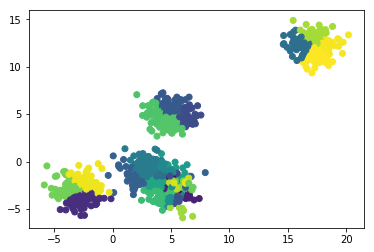

Comparing the assigned categories to the ones in the data: 
col_0  0   1   2   3   4   5   6   7   8   9  ...  66  67  68  69  70  71  72  \
row_0                                         ...                               
0       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   1   0   0   0   0 ...   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4       1   3   2   1   1   4   1   8   2   4 ...   1   4   1   1   2   1   1   

col_0  73  74  75  
row_0              
0       0   0   0  
1      67   0   0  
2       1   0   0  
3       0  31  51  
4       0   0   0  

[5 rows x 76 columns]


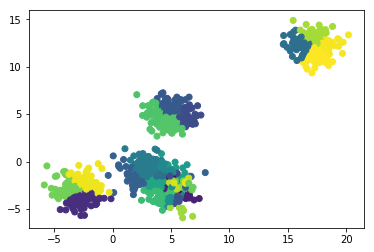

Comparing the assigned categories to the ones in the data: 
col_0  0   1   2   3   4   5   6   7   8   9  ...  66  67  68  69  70  71  72  \
row_0                                         ...                               
0       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   1   0   0   0   0 ...   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4       1   3   2   1   1   4   1   8   2   4 ...   1   4   1   1   2   1   1   

col_0  73  74  75  
row_0              
0       0   0   0  
1      67   0   0  
2       1   0   0  
3       0  31  51  
4       0   0   0  

[5 rows x 76 columns]


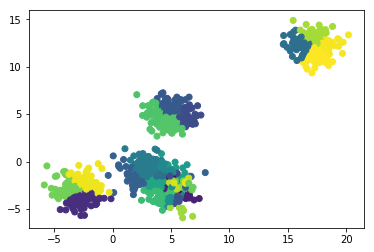

Comparing the assigned categories to the ones in the data: 
col_0  0   1   2   3   4   5   6   7   8   9  ...  66  67  68  69  70  71  72  \
row_0                                         ...                               
0       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   1   0   0   0   0 ...   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4       1   3   2   1   1   4   1   8   2   4 ...   1   4   1   1   2   1   1   

col_0  73  74  75  
row_0              
0       0   0   0  
1      67   0   0  
2       1   0   0  
3       0  31  51  
4       0   0   0  

[5 rows x 76 columns]


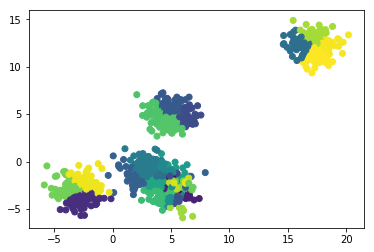

Comparing the assigned categories to the ones in the data: 
col_0  0   1   2   3   4   5   6   7   8   9  ...  66  67  68  69  70  71  72  \
row_0                                         ...                               
0       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   1   0   0   0   0 ...   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4       1   3   2   1   1   4   1   8   2   4 ...   1   4   1   1   2   1   1   

col_0  73  74  75  
row_0              
0       0   0   0  
1      67   0   0  
2       1   0   0  
3       0  31  51  
4       0   0   0  

[5 rows x 76 columns]


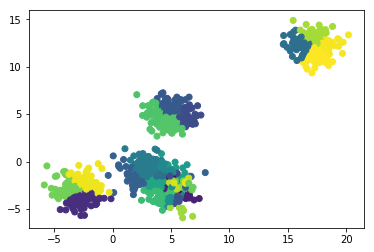

Comparing the assigned categories to the ones in the data: 
col_0  0   1   2   3   4   5   6   7   8   9  ...  66  67  68  69  70  71  72  \
row_0                                         ...                               
0       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   1   0   0   0   0 ...   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4       1   3   2   1   1   4   1   8   2   4 ...   1   4   1   1   2   1   1   

col_0  73  74  75  
row_0              
0       0   0   0  
1      67   0   0  
2       1   0   0  
3       0  31  51  
4       0   0   0  

[5 rows x 76 columns]


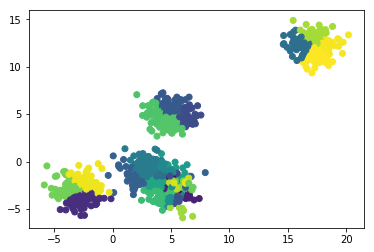

Comparing the assigned categories to the ones in the data: 
col_0  0   1   2   3   4   5   6   7   8   9  ...  66  67  68  69  70  71  72  \
row_0                                         ...                               
0       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   1   0   0   0   0 ...   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4       1   3   2   1   1   4   1   8   2   4 ...   1   4   1   1   2   1   1   

col_0  73  74  75  
row_0              
0       0   0   0  
1      67   0   0  
2       1   0   0  
3       0  31  51  
4       0   0   0  

[5 rows x 76 columns]


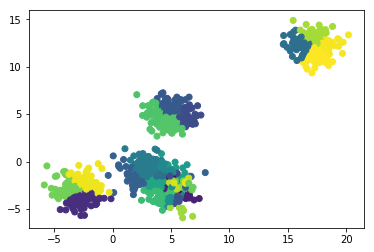

Comparing the assigned categories to the ones in the data: 
col_0  0   1   2   3   4   5   6   7   8   9  ...  66  67  68  69  70  71  72  \
row_0                                         ...                               
0       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   1   0   0   0   0 ...   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4       1   3   2   1   1   4   1   8   2   4 ...   1   4   1   1   2   1   1   

col_0  73  74  75  
row_0              
0       0   0   0  
1      67   0   0  
2       1   0   0  
3       0  31  51  
4       0   0   0  

[5 rows x 76 columns]


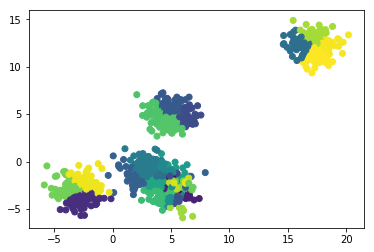

Comparing the assigned categories to the ones in the data: 
col_0  0   1   2   3   4   5   6   7   8   9  ...  66  67  68  69  70  71  72  \
row_0                                         ...                               
0       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   0   1   0   0   0   0 ...   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4       1   3   2   1   1   4   1   8   2   4 ...   1   4   1   1   2   1   1   

col_0  73  74  75  
row_0              
0       0   0   0  
1      67   0   0  
2       1   0   0  
3       0  31  51  
4       0   0   0  

[5 rows x 76 columns]
5.66 s ± 205 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [88]:
%%timeit

af = AffinityPropagation()
af.fit(X_train)

# Extract cluster assignments for each data point.
labels = af.labels_

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

For 5 clusters:
- K-means: 255 ms
- Mean shift: 427 ms
- Spectral Clustering:  827 ms
- Affinity propagation: 5.66 s (creates 76 clusters)

For 5 clusters, mean-shift, does better in accuracy than k-means.  Spectral clustering comes in 3rd and there aren’t enough clusters for affinity propagation to be useful.

## Configuration 2

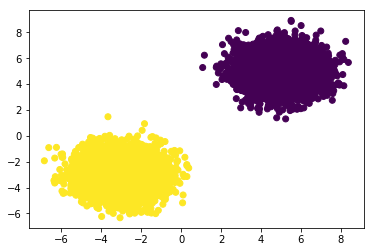

In [105]:
# The coordinates of the centers of our blobs.
centers = [[5,5],[-3,-3]]

# Make 10,000 rows worth of data with two features representing TWO
# clusters, each having a standard deviation of 1.

X,y = make_blobs(
    n_samples = 10000,
    centers = centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.9,
    random_state = 42)

## K-Means

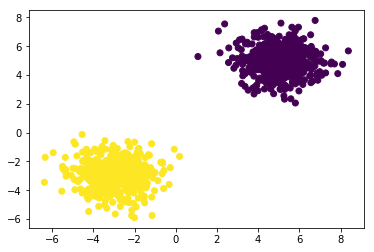

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        0  488


In [90]:
# Run without timeit

# Each batch will be made up of 1000 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=1000)
minibatchkmeans.fit(X_train)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict_mini)
plt.show()

# Check the MiniBatch model against our earlier one.
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict_mini))

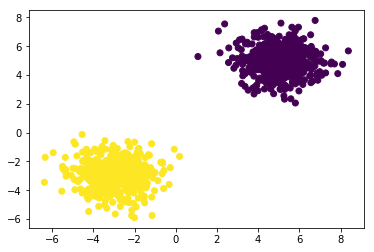

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        0  488


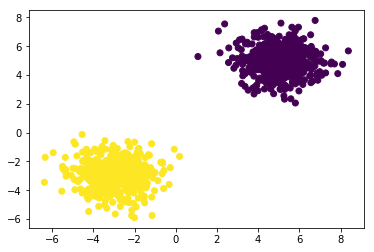

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        0  488


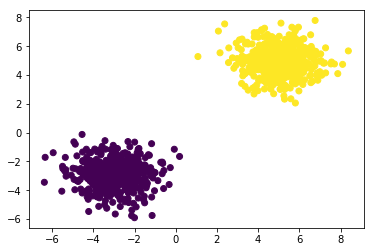

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  512
1      488    0


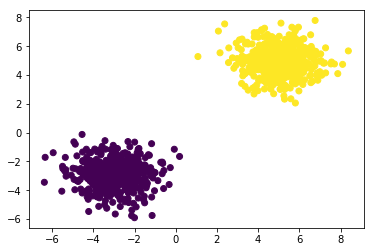

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  512
1      488    0


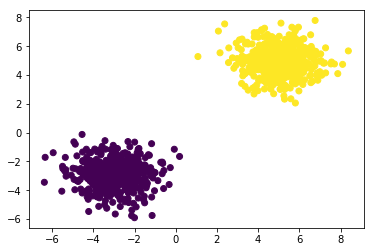

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  512
1      488    0


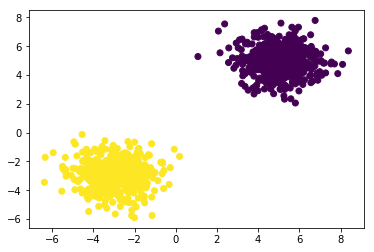

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        0  488


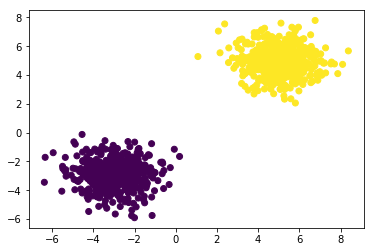

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  512
1      488    0


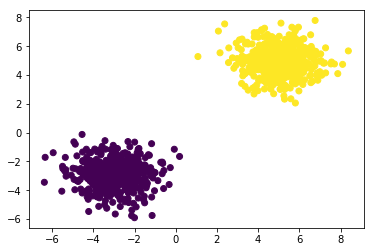

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        0  512
1      488    0
255 ms ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
%%timeit
# Run with timeit


# Each batch will be made up of 1000 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=1000)
minibatchkmeans.fit(X_train)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict_mini)
plt.show()

# Check the MiniBatch model against our earlier one.
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict_mini))
         

## Mean-shift Clustering

Number of estimated clusters: 2


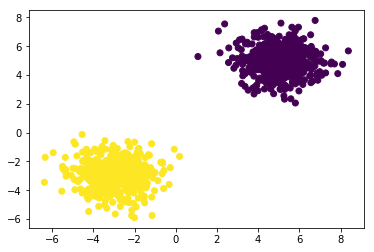

Comparing the assigned categories to the ones in the data: 
col_0    0    1
row_0          
0      512    0
1        0  488


In [92]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.3)

#Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding = True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count your clusters
n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters: {}'.format(n_clusters_))

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

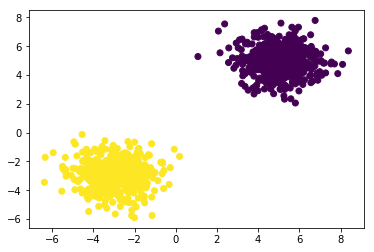

Comparing the assigned categories to the ones in the data: 
col_0    0    1
row_0          
0      512    0
1        0  488


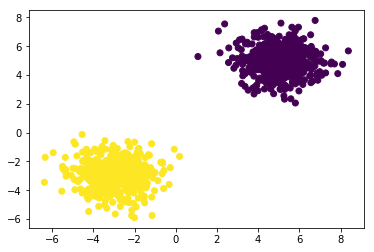

Comparing the assigned categories to the ones in the data: 
col_0    0    1
row_0          
0      512    0
1        0  488


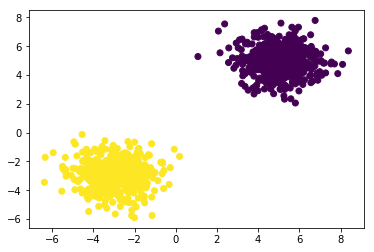

Comparing the assigned categories to the ones in the data: 
col_0    0    1
row_0          
0      512    0
1        0  488


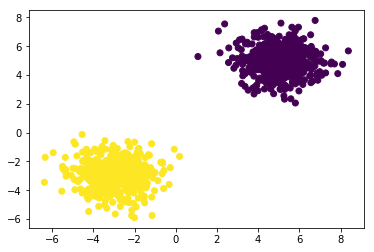

Comparing the assigned categories to the ones in the data: 
col_0    0    1
row_0          
0      512    0
1        0  488


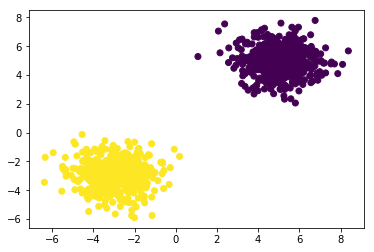

Comparing the assigned categories to the ones in the data: 
col_0    0    1
row_0          
0      512    0
1        0  488


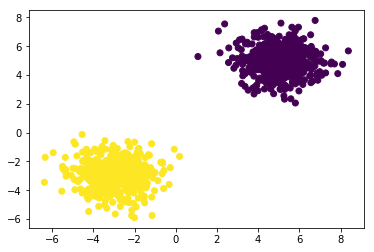

Comparing the assigned categories to the ones in the data: 
col_0    0    1
row_0          
0      512    0
1        0  488


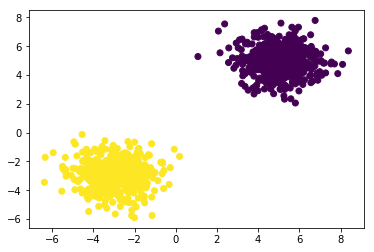

Comparing the assigned categories to the ones in the data: 
col_0    0    1
row_0          
0      512    0
1        0  488


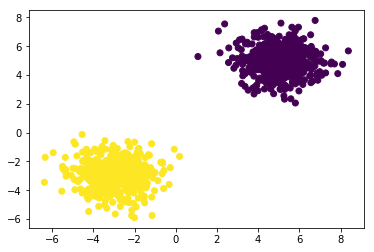

Comparing the assigned categories to the ones in the data: 
col_0    0    1
row_0          
0      512    0
1        0  488
385 ms ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
%%timeit
# Run with timeit

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.3)

#Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding = True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

## Spectral Clustering

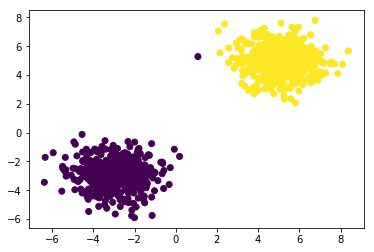

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        1  511
1      488    0


In [94]:
# We're looking for TWO clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predicted clusters
predict = sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:,0], X_train[:,1], c = predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

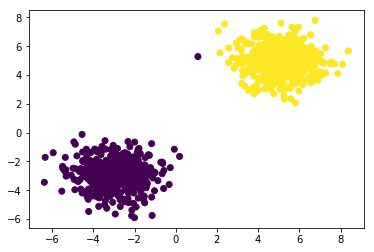

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        1  511
1      488    0


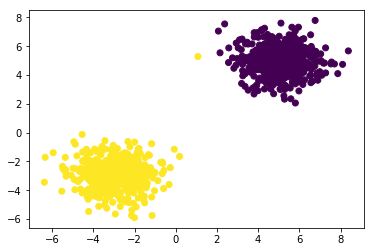

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      511    1
1        0  488


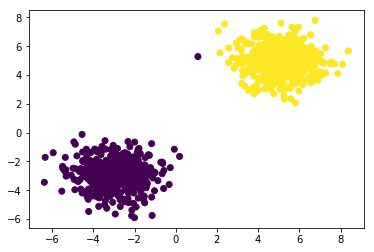

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        1  511
1      488    0


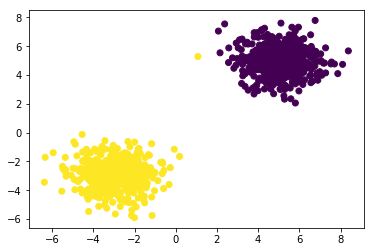

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      511    1
1        0  488


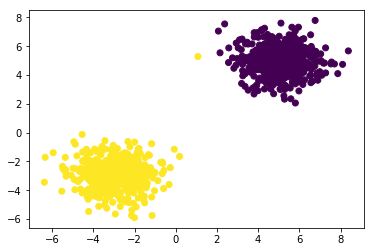

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      511    1
1        0  488


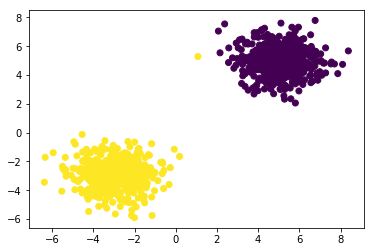

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      511    1
1        0  488


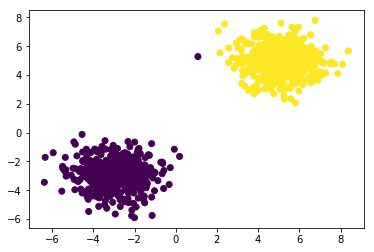

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0        1  511
1      488    0


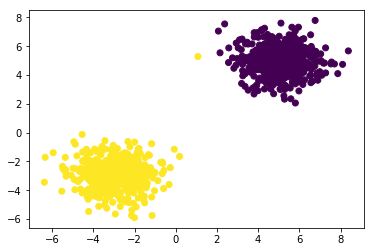

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      511    1
1        0  488
767 ms ± 70.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [95]:
%%timeit
# Run with timeit


# We're looking for FIVE clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predicted clusters
predict = sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:,0], X_train[:,1], c = predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

## Affinity Propogation

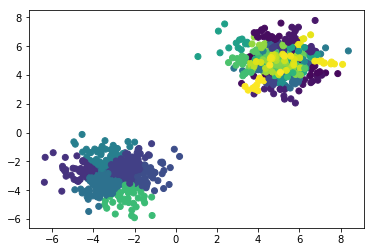

Comparing the assigned categories to the ones in the data: 
col_0  0    1    2    3    4    5    6    7    8    9   ...   232  233  234  \
row_0                                                   ...                   
0        3    1    4    1    1    9    1    1   18    2 ...     9    1    1   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  235  236  237  238  239  240  241  
row_0                                     
0        1    1    9    1    1   12    2  
1        0    0    0    0    0    0    0  

[2 rows x 242 columns]


In [106]:
af = AffinityPropagation()
af.fit(X_train)

# Extract cluster assignments for each data point.
labels = af.labels_

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

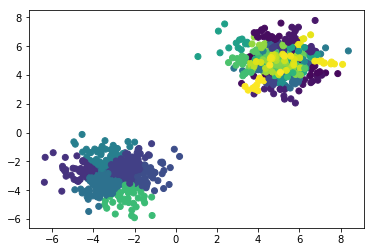

Comparing the assigned categories to the ones in the data: 
col_0  0    1    2    3    4    5    6    7    8    9   ...   232  233  234  \
row_0                                                   ...                   
0        3    1    4    1    1    9    1    1   18    2 ...     9    1    1   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  235  236  237  238  239  240  241  
row_0                                     
0        1    1    9    1    1   12    2  
1        0    0    0    0    0    0    0  

[2 rows x 242 columns]


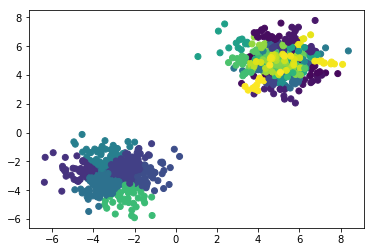

Comparing the assigned categories to the ones in the data: 
col_0  0    1    2    3    4    5    6    7    8    9   ...   232  233  234  \
row_0                                                   ...                   
0        3    1    4    1    1    9    1    1   18    2 ...     9    1    1   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  235  236  237  238  239  240  241  
row_0                                     
0        1    1    9    1    1   12    2  
1        0    0    0    0    0    0    0  

[2 rows x 242 columns]


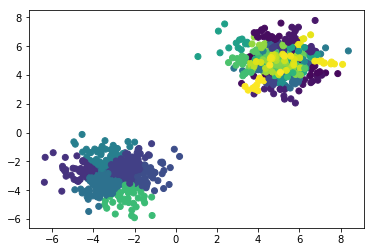

Comparing the assigned categories to the ones in the data: 
col_0  0    1    2    3    4    5    6    7    8    9   ...   232  233  234  \
row_0                                                   ...                   
0        3    1    4    1    1    9    1    1   18    2 ...     9    1    1   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  235  236  237  238  239  240  241  
row_0                                     
0        1    1    9    1    1   12    2  
1        0    0    0    0    0    0    0  

[2 rows x 242 columns]


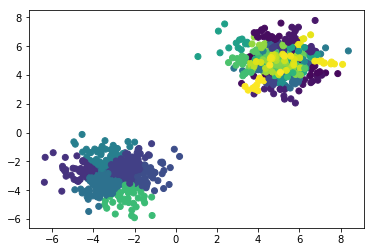

Comparing the assigned categories to the ones in the data: 
col_0  0    1    2    3    4    5    6    7    8    9   ...   232  233  234  \
row_0                                                   ...                   
0        3    1    4    1    1    9    1    1   18    2 ...     9    1    1   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  235  236  237  238  239  240  241  
row_0                                     
0        1    1    9    1    1   12    2  
1        0    0    0    0    0    0    0  

[2 rows x 242 columns]


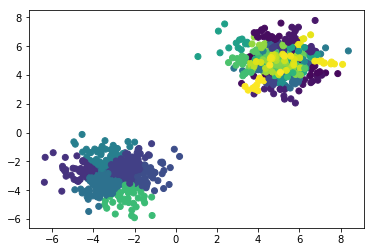

Comparing the assigned categories to the ones in the data: 
col_0  0    1    2    3    4    5    6    7    8    9   ...   232  233  234  \
row_0                                                   ...                   
0        3    1    4    1    1    9    1    1   18    2 ...     9    1    1   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  235  236  237  238  239  240  241  
row_0                                     
0        1    1    9    1    1   12    2  
1        0    0    0    0    0    0    0  

[2 rows x 242 columns]


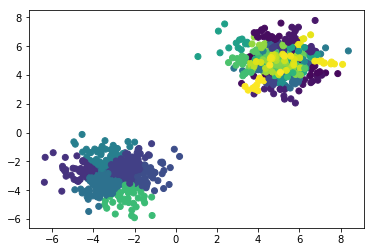

Comparing the assigned categories to the ones in the data: 
col_0  0    1    2    3    4    5    6    7    8    9   ...   232  233  234  \
row_0                                                   ...                   
0        3    1    4    1    1    9    1    1   18    2 ...     9    1    1   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  235  236  237  238  239  240  241  
row_0                                     
0        1    1    9    1    1   12    2  
1        0    0    0    0    0    0    0  

[2 rows x 242 columns]


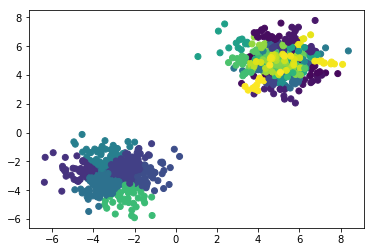

Comparing the assigned categories to the ones in the data: 
col_0  0    1    2    3    4    5    6    7    8    9   ...   232  233  234  \
row_0                                                   ...                   
0        3    1    4    1    1    9    1    1   18    2 ...     9    1    1   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  235  236  237  238  239  240  241  
row_0                                     
0        1    1    9    1    1   12    2  
1        0    0    0    0    0    0    0  

[2 rows x 242 columns]


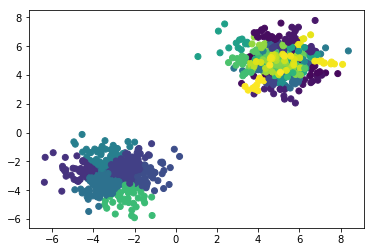

Comparing the assigned categories to the ones in the data: 
col_0  0    1    2    3    4    5    6    7    8    9   ...   232  233  234  \
row_0                                                   ...                   
0        3    1    4    1    1    9    1    1   18    2 ...     9    1    1   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  235  236  237  238  239  240  241  
row_0                                     
0        1    1    9    1    1   12    2  
1        0    0    0    0    0    0    0  

[2 rows x 242 columns]
5.66 s ± 66.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [107]:
%%timeit

af = AffinityPropagation()
af.fit(X_train)

# Extract cluster assignments for each data point.
labels = af.labels_

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

For 2 clusters:
- K-means: 255 ms
- Mean shift: 385 ms
- Spectral Clustering:  767 ms
- Affinity propagation: 5.66 s  (made 242 columns(clusters))

For 2 clusters, they all do equally well, except affinity propagation that shouldn’t be used with so few clusters.  K-means is best because of its speed.


## Configuration 3

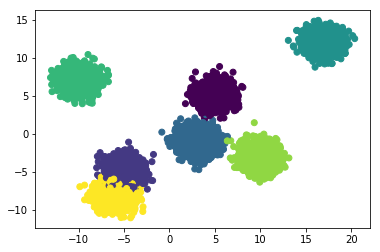

In [108]:
# The coordinates of the centers of our blobs.
centers = [[5,5],[-5,-5],[3,-1], [17,12], [-10, 7], [10,-3], [-6, -8]]

# Make 10,000 rows worth of data with two features representing SEVEN
# clusters, each having a standard deviation of 1.

X,y = make_blobs(
    n_samples = 10000,
    centers = centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.9,
    random_state = 42)

## K-Means

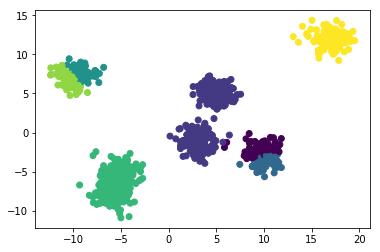

Comparing the assigned categories to the ones in the data:
col_0   0    1   2   3    4   5    6
row_0                               
0       0  149   0   0    0   0    0
1       0    0   0   0  155   0    0
2       2  145   0   0    0   0    0
3       0    0   0   0    0   0  135
4       0    0   0  65    0  76    0
5      89    0  61   0    0   0    0
6       0    0   0   0  123   0    0


In [97]:
# Run without timeit

# Each batch will be made up of 1000 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=7,
    batch_size=1000)
minibatchkmeans.fit(X_train)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict_mini)
plt.show()

# Check the MiniBatch model against our earlier one.
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict_mini))

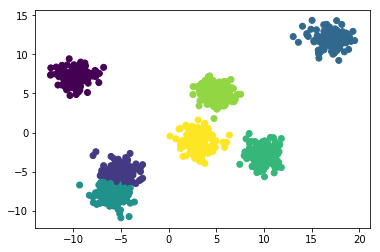

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0        0    0    0    0    0  149    0
1        0  143    0   12    0    0    0
2        0    0    0    0    0    1  146
3        0    0  135    0    0    0    0
4      141    0    0    0    0    0    0
5        0    0    0    0  150    0    0
6        0    5    0  118    0    0    0


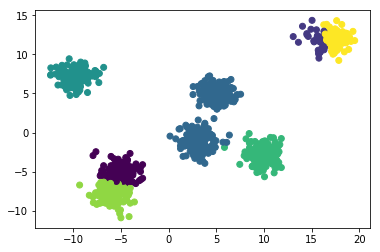

Comparing the assigned categories to the ones in the data:
col_0    0   1    2    3    4    5   6
row_0                                 
0        0   0  149    0    0    0   0
1      145   0    0    0    0   10   0
2        0   0  146    0    1    0   0
3        0  37    0    0    0    0  98
4        0   0    0  141    0    0   0
5        0   0    0    0  150    0   0
6        5   0    0    0    0  118   0


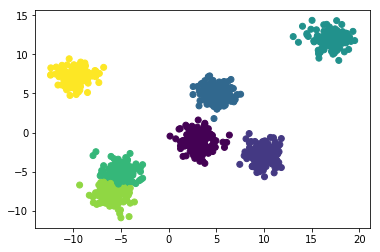

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0        0    0  149    0    0    0    0
1        0    0    0    0  146    9    0
2      146    0    1    0    0    0    0
3        0    0    0  135    0    0    0
4        0    0    0    0    0    0  141
5        0  150    0    0    0    0    0
6        0    0    0    0    5  118    0


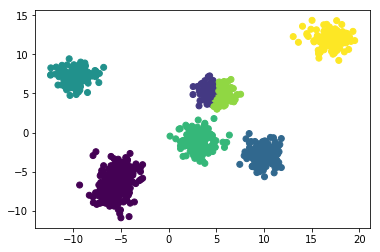

Comparing the assigned categories to the ones in the data:
col_0    0   1    2    3    4   5    6
row_0                                 
0        0  67    0    0    0  82    0
1      155   0    0    0    0   0    0
2        0   0    0    0  147   0    0
3        0   0    0    0    0   0  135
4        0   0    0  141    0   0    0
5        0   0  150    0    0   0    0
6      123   0    0    0    0   0    0


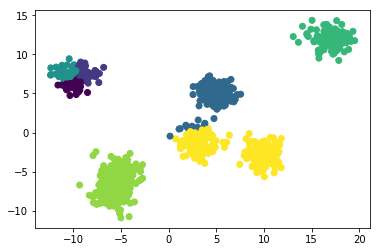

Comparing the assigned categories to the ones in the data:
col_0   0   1    2   3    4    5    6
row_0                                
0       0   0  149   0    0    0    0
1       0   0    0   0    0  155    0
2       0   0   16   0    0    0  131
3       0   0    0   0  135    0    0
4      43  52    0  46    0    0    0
5       0   0    0   0    0    0  150
6       0   0    0   0    0  123    0


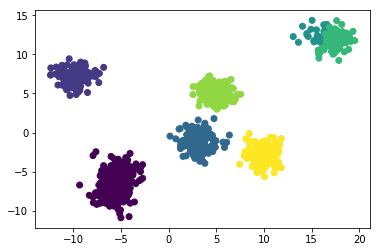

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3    4    5    6
row_0                                  
0        0    0    0   0    0  149    0
1      155    0    0   0    0    0    0
2        0    0  147   0    0    0    0
3        0    0    0  19  116    0    0
4        0  141    0   0    0    0    0
5        0    0    0   0    0    0  150
6      123    0    0   0    0    0    0


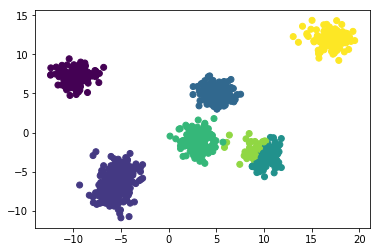

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4   5    6
row_0                                  
0        0    0  149    0    0   0    0
1        0  155    0    0    0   0    0
2        0    0    0    0  144   3    0
3        0    0    0    0    0   0  135
4      141    0    0    0    0   0    0
5        0    0    0  106    0  44    0
6        0  123    0    0    0   0    0


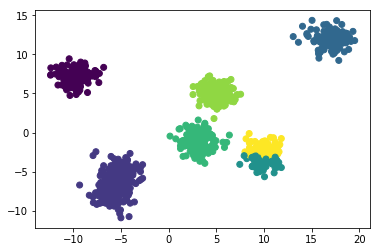

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3    4    5   6
row_0                                 
0        0    0    0   0    0  149   0
1        0  155    0   0    0    0   0
2        0    0    0   0  146    1   0
3        0    0  135   0    0    0   0
4      141    0    0   0    0    0   0
5        0    0    0  67    0    0  83
6        0  123    0   0    0    0   0
356 ms ± 19.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
%%timeit
# Run with timeit


# Each batch will be made up of 1000 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=7,
    batch_size=1000)
minibatchkmeans.fit(X_train)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict_mini)
plt.show()

# Check the MiniBatch model against our earlier one.
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict_mini))
         

## Mean-shift Clustering

Number of estimated clusters: 7


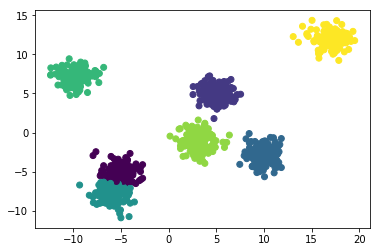

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0        0  149    0    0    0    0    0
1      143    0    0   12    0    0    0
2        0    1    0    0    0  146    0
3        0    0    0    0    0    0  135
4        0    0    0    0  141    0    0
5        0    0  150    0    0    0    0
6        5    0    0  118    0    0    0


In [101]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.08)

#Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding = True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count your clusters
n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters: {}'.format(n_clusters_))

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

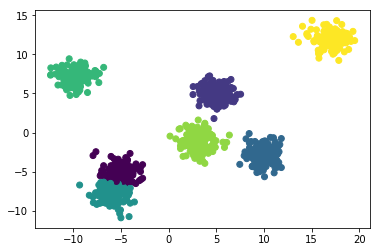

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0        0  149    0    0    0    0    0
1      143    0    0   12    0    0    0
2        0    1    0    0    0  146    0
3        0    0    0    0    0    0  135
4        0    0    0    0  141    0    0
5        0    0  150    0    0    0    0
6        5    0    0  118    0    0    0


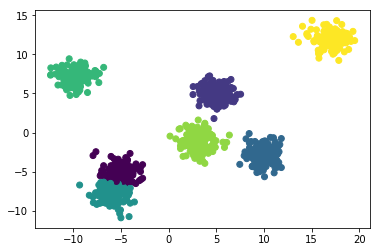

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0        0  149    0    0    0    0    0
1      143    0    0   12    0    0    0
2        0    1    0    0    0  146    0
3        0    0    0    0    0    0  135
4        0    0    0    0  141    0    0
5        0    0  150    0    0    0    0
6        5    0    0  118    0    0    0


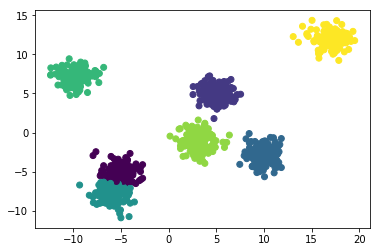

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0        0  149    0    0    0    0    0
1      143    0    0   12    0    0    0
2        0    1    0    0    0  146    0
3        0    0    0    0    0    0  135
4        0    0    0    0  141    0    0
5        0    0  150    0    0    0    0
6        5    0    0  118    0    0    0


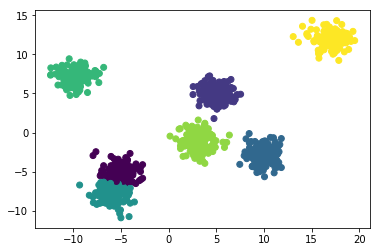

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0        0  149    0    0    0    0    0
1      143    0    0   12    0    0    0
2        0    1    0    0    0  146    0
3        0    0    0    0    0    0  135
4        0    0    0    0  141    0    0
5        0    0  150    0    0    0    0
6        5    0    0  118    0    0    0


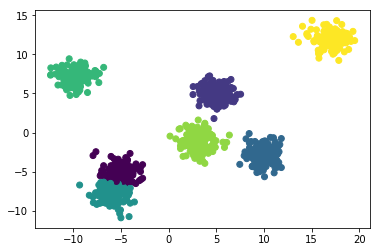

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0        0  149    0    0    0    0    0
1      143    0    0   12    0    0    0
2        0    1    0    0    0  146    0
3        0    0    0    0    0    0  135
4        0    0    0    0  141    0    0
5        0    0  150    0    0    0    0
6        5    0    0  118    0    0    0


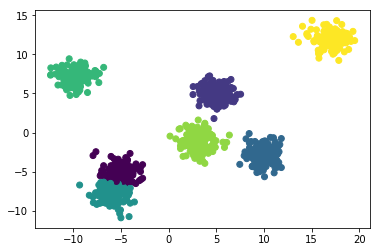

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0        0  149    0    0    0    0    0
1      143    0    0   12    0    0    0
2        0    1    0    0    0  146    0
3        0    0    0    0    0    0  135
4        0    0    0    0  141    0    0
5        0    0  150    0    0    0    0
6        5    0    0  118    0    0    0


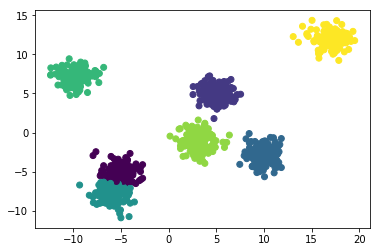

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0        0  149    0    0    0    0    0
1      143    0    0   12    0    0    0
2        0    1    0    0    0  146    0
3        0    0    0    0    0    0  135
4        0    0    0    0  141    0    0
5        0    0  150    0    0    0    0
6        5    0    0  118    0    0    0


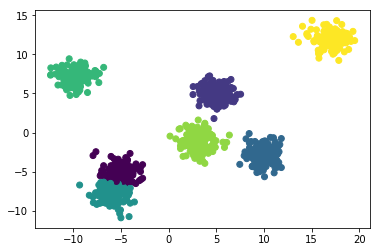

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0        0  149    0    0    0    0    0
1      143    0    0   12    0    0    0
2        0    1    0    0    0  146    0
3        0    0    0    0    0    0  135
4        0    0    0    0  141    0    0
5        0    0  150    0    0    0    0
6        5    0    0  118    0    0    0
416 ms ± 28.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [102]:
%%timeit
# Run with timeit

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.08)

#Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding = True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

## Spectral Clustering

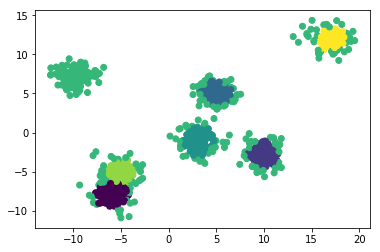

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5   6
row_0                                  
0        0    0  113    0   36    0   0
1       12    0    0    0   28  115   0
2        0    0    0  115   32    0   0
3        0    0    0    0   41    0  94
4        0    0    0    0  141    0   0
5        0  116    0    0   34    0   0
6      101    0    0    0   21    1   0


In [103]:
# We're looking for SEVEN clusters.
n_clusters=7

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predicted clusters
predict = sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:,0], X_train[:,1], c = predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

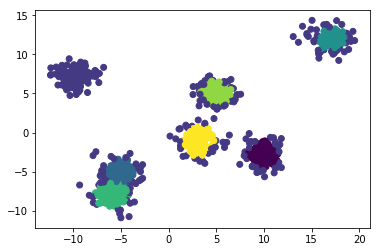

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3    4    5    6
row_0                                  
0        0   36    0   0    0  113    0
1        0   27  116   0   12    0    0
2        0   32    0   0    0    0  115
3        0   42    0  93    0    0    0
4        0  141    0   0    0    0    0
5      116   34    0   0    0    0    0
6        0   21    1   0  101    0    0


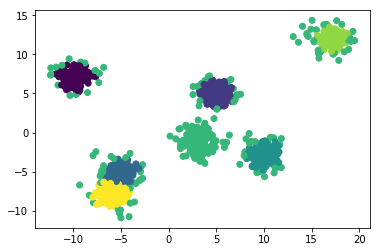

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0        0  128    0    0   21    0    0
1        0    0  122    0   21    0   12
2        0    0    0    0  147    0    0
3        0    0    0    0   32  103    0
4      123    0    0    0   18    0    0
5        0    0    0  131   19    0    0
6        0    0    1    0   14    0  108


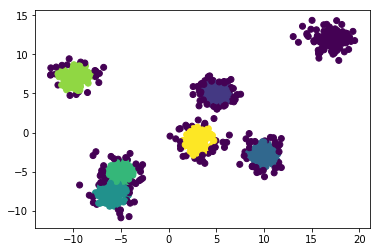

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0       43  106    0    0    0    0    0
1       29    0    0   12  114    0    0
2       34    0    0    0    0    0  113
3      135    0    0    0    0    0    0
4       22    0    0    0    0  119    0
5       35    0  115    0    0    0    0
6       21    0    0  101    1    0    0


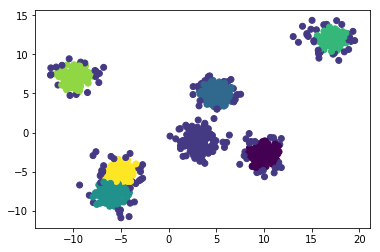

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0        0   22  127    0    0    0    0
1        0   22    0   12    0    0  121
2        0  147    0    0    0    0    0
3        0   33    0    0  102    0    0
4        0   19    0    0    0  122    0
5      126   24    0    0    0    0    0
6        0   14    0  108    0    0    1


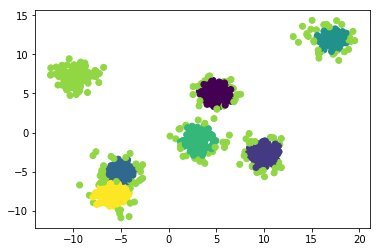

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0      125    0    0    0    0   24    0
1        0    0  116    0    0   28   11
2        0    0    0    0  121   26    0
3        0    0    0  100    0   35    0
4        0    0    0    0    0  141    0
5        0  124    0    0    0   26    0
6        0    0    1    0    0   17  105


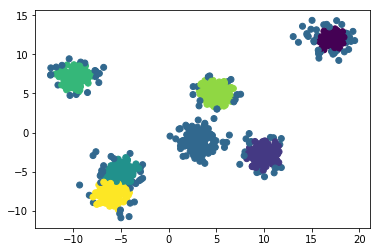

Comparing the assigned categories to the ones in the data:
col_0   0    1    2    3    4    5    6
row_0                                  
0       0    0   17    0    0  132    0
1       0    0   20  123    0    0   12
2       0    0  147    0    0    0    0
3      96    0   39    0    0    0    0
4       0    0   19    0  122    0    0
5       0  132   18    0    0    0    0
6       0    0   13    1    0    0  109


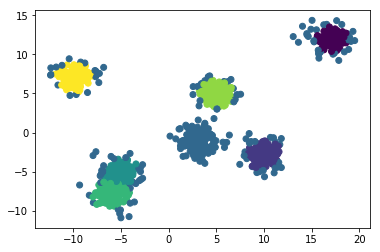

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0        0    0   22    0    0  127    0
1        0    0   22  121   12    0    0
2        0    0  147    0    0    0    0
3      102    0   33    0    0    0    0
4        0    0   19    0    0    0  122
5        0  126   24    0    0    0    0
6        0    0   14    1  108    0    0


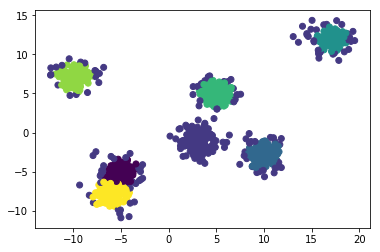

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5    6
row_0                                   
0        0   22    0    0  127    0    0
1      121   22    0    0    0    0   12
2        0  147    0    0    0    0    0
3        0   33    0  102    0    0    0
4        0   19    0    0    0  122    0
5        0   24  126    0    0    0    0
6        1   14    0    0    0    0  108
1.06 s ± 99.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [104]:
%%timeit
# Run with timeit


# We're looking for SEVEN clusters.
n_clusters=7

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predicted clusters
predict = sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:,0], X_train[:,1], c = predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

Uses classification of one of the cluster types (classes) for the data points at the periphery of the other clusters. 

## Affinity Propogation

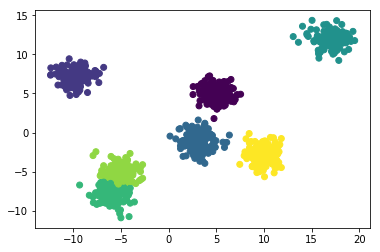

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0      149    0    0    0    0    0    0
1        0    0    0    0    7  148    0
2        1    0  146    0    0    0    0
3        0    0    0  135    0    0    0
4        0  141    0    0    0    0    0
5        0    0    0    0    0    0  150
6        0    0    0    0  118    5    0


In [109]:
af = AffinityPropagation()
af.fit(X_train)

# Extract cluster assignments for each data point.
labels = af.labels_

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

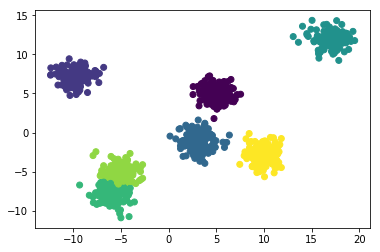

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0      149    0    0    0    0    0    0
1        0    0    0    0    7  148    0
2        1    0  146    0    0    0    0
3        0    0    0  135    0    0    0
4        0  141    0    0    0    0    0
5        0    0    0    0    0    0  150
6        0    0    0    0  118    5    0


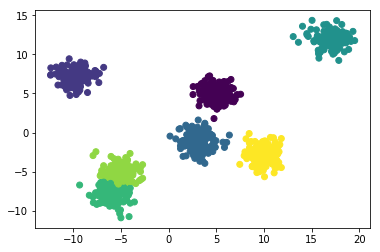

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0      149    0    0    0    0    0    0
1        0    0    0    0    7  148    0
2        1    0  146    0    0    0    0
3        0    0    0  135    0    0    0
4        0  141    0    0    0    0    0
5        0    0    0    0    0    0  150
6        0    0    0    0  118    5    0


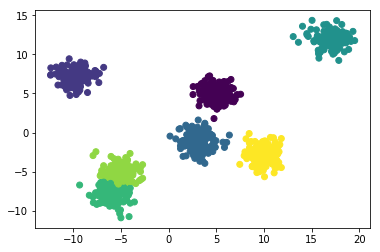

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0      149    0    0    0    0    0    0
1        0    0    0    0    7  148    0
2        1    0  146    0    0    0    0
3        0    0    0  135    0    0    0
4        0  141    0    0    0    0    0
5        0    0    0    0    0    0  150
6        0    0    0    0  118    5    0


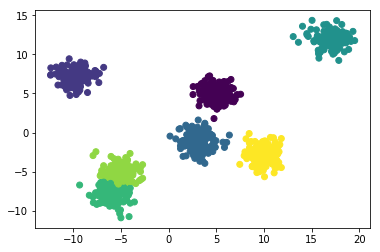

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0      149    0    0    0    0    0    0
1        0    0    0    0    7  148    0
2        1    0  146    0    0    0    0
3        0    0    0  135    0    0    0
4        0  141    0    0    0    0    0
5        0    0    0    0    0    0  150
6        0    0    0    0  118    5    0


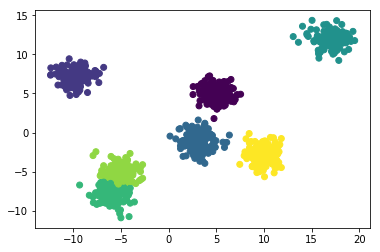

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0      149    0    0    0    0    0    0
1        0    0    0    0    7  148    0
2        1    0  146    0    0    0    0
3        0    0    0  135    0    0    0
4        0  141    0    0    0    0    0
5        0    0    0    0    0    0  150
6        0    0    0    0  118    5    0


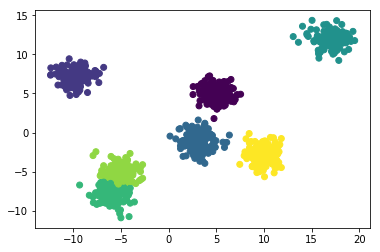

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0      149    0    0    0    0    0    0
1        0    0    0    0    7  148    0
2        1    0  146    0    0    0    0
3        0    0    0  135    0    0    0
4        0  141    0    0    0    0    0
5        0    0    0    0    0    0  150
6        0    0    0    0  118    5    0


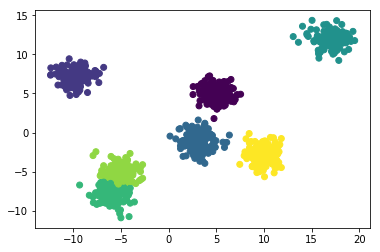

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0      149    0    0    0    0    0    0
1        0    0    0    0    7  148    0
2        1    0  146    0    0    0    0
3        0    0    0  135    0    0    0
4        0  141    0    0    0    0    0
5        0    0    0    0    0    0  150
6        0    0    0    0  118    5    0


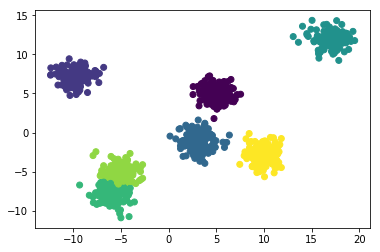

Comparing the assigned categories to the ones in the data: 
col_0    0    1    2    3    4    5    6
row_0                                   
0      149    0    0    0    0    0    0
1        0    0    0    0    7  148    0
2        1    0  146    0    0    0    0
3        0    0    0  135    0    0    0
4        0  141    0    0    0    0    0
5        0    0    0    0    0    0  150
6        0    0    0    0  118    5    0
4.77 s ± 179 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [110]:
%%timeit

af = AffinityPropagation()
af.fit(X_train)

# Extract cluster assignments for each data point.
labels = af.labels_

plt.scatter(X_train[:,0], X_train[:,1], c = labels)
plt.show()

print('Comparing the assigned categories to the ones in the data: ')
print(pd.crosstab(y_train, labels))

For 7 clusters:
- K-means: 356 ms
- Mean shift: 416 ms
- Spectral Clustering:  1.06 s
- Affinity propagation: 4.77 s (made 7 columns(clusters))

For 7 clusters, affinity propagation looks like it’s found its place, coming up with 7 clusters to match 7 centers, and does slightly better in accuracy than mean-shift, k-means comes in 3rd and spectral clustering last.
